In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


df = pd.read_csv('realtor-data.zip.csv')
# Filter for Virginia state
df = df[df['state'] == 'Virginia']
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
12259,58986.0,for_sale,75000.0,NaN,NaN,NaN,1962911.0,Chincoteague,Virginia,23336.0,NaN,NaN
24269,16653.0,for_sale,249000.0,NaN,NaN,0.31,794832.0,Chincoteague,Virginia,23336.0,NaN,NaN
100871,7738.0,for_sale,680000.0,NaN,NaN,0.22,129746.0,Cape Charles,Virginia,23310.0,NaN,NaN
100872,7738.0,for_sale,725000.0,NaN,NaN,0.22,229091.0,Cape Charles,Virginia,23310.0,NaN,NaN
100873,7738.0,for_sale,755000.0,NaN,NaN,0.22,263685.0,Cape Charles,Virginia,23310.0,NaN,NaN


In [ ]:
# Handle missing values, for example: fill NaNs with the median for numeric columns
df['bed'].fillna(df['bed'].median(), inplace=True)
df['bath'].fillna(df['bath'].median(), inplace=True)
df['acre_lot'].fillna(df['acre_lot'].median(), inplace=True)
df['house_size'].fillna(df['house_size'].median(), inplace=True)
df = df[df['price'] != 6e7]

#drop rows with missing house value
df.dropna(subset=['price'], inplace=True)


<ipython-input-90-3a60ad71a37e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bed'].fillna(df['bed'].median(), inplace=True)
<ipython-input-90-3a60ad71a37e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [ ]:
df['is_high_value'] = df['price'] > 500000
df['close_to_high_value'] = 0
df['close_to_high_value'] = np.where(df['acre_lot'] < 0.3, 1, 0)
print(df[['price', 'acre_lot', 'close_to_high_value']].head())

           price  acre_lot  close_to_high_value
12259    75000.0      0.40                    0
24269   249000.0      0.31                    0
100871  680000.0      0.22                    1
100872  725000.0      0.22                    1
100873  755000.0      0.22                    1


In [ ]:
# Select the features and target variable
X = df[['bed', 'bath', 'acre_lot', 'house_size', 'close_to_high_value'] + [col for col in df.columns if col.startswith('city_') or col.startswith('state_')]]
y = df['price']

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Evaluate the effect of being close to high-value houses
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


Mean Squared Error: 196986921854.54468
R-squared: 0.3123230554838188
                       Coefficient
bed                  -44091.658224
bath                  32488.052712
acre_lot             193240.427155
house_size           367822.185288
close_to_high_value   44717.813321


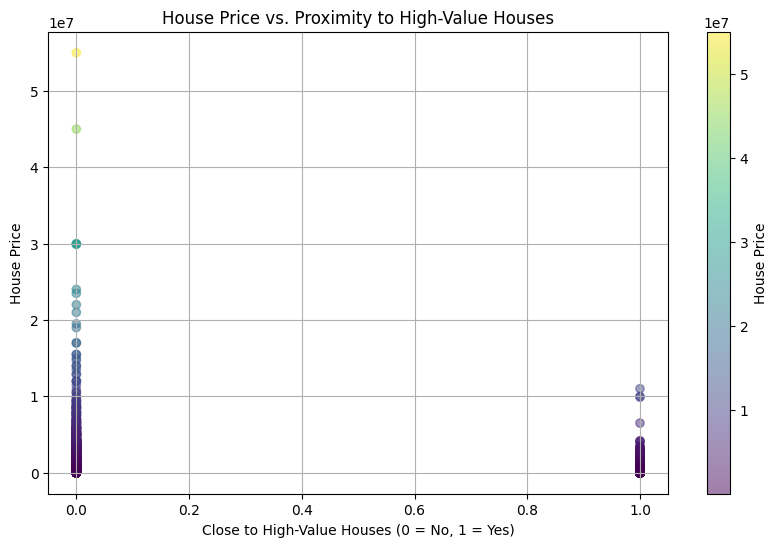

In [ ]:
# Scatter plot to visualize house price vs proximity to high-value houses
plt.figure(figsize=(10, 6))
plt.scatter(df['close_to_high_value'], df['price'], alpha=0.5, c=df['price'], cmap='viridis')
plt.title('House Price vs. Proximity to High-Value Houses')
plt.xlabel('Close to High-Value Houses (0 = No, 1 = Yes)')
plt.ylabel('House Price')
plt.colorbar(label='House Price')  # Colorbar to show the price
plt.grid(True)
plt.show()

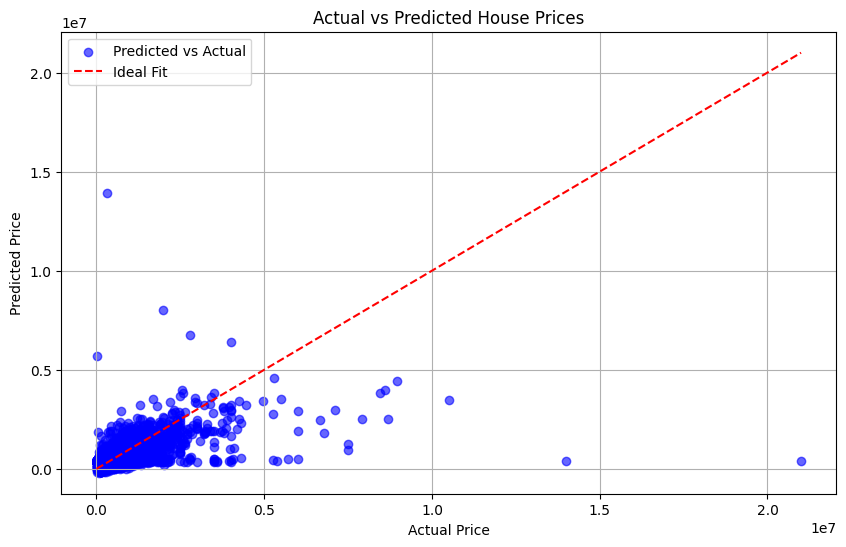

In [ ]:
# Scatter plot of actual vs predicted values from the model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, c='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit')
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.grid(True)
plt.show()
